In [1]:
import numpy as np
import pandas as pd
import math
import tensorflow as tf
import io
import matplotlib as plt

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
df=pd.read_csv(r"C:\Users\alauk\Downloads\arjun\full_data.csv")

In [2]:
display(df.head())

NameError: name 'df' is not defined

In [7]:
df.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [23]:
print(df.iloc[:,0].unique())
print(df.iloc[:,2].unique())
print(df.iloc[:,3].unique())
print(df.iloc[:,4].unique())
print(df.iloc[:,5].unique())
print(df.iloc[:,6].unique())
print(df.iloc[:,9].unique())
print(df.iloc[:,10].unique())

['Male' 'Female']
[0 1]
[1 0]
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
[1 0]


In [24]:
df["ever_married"]=df["ever_married"].replace("Yes",1)
df["ever_married"]=df["ever_married"].replace("No",0)
display(df.head())

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


In [26]:
df["Residence_type"]=df["Residence_type"].replace("Urban",1)
df["Residence_type"]=df["Residence_type"].replace("Rural",0)
display(df.head())

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
2,Female,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
3,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
4,Male,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1


In [27]:
df["work_type"]=df["work_type"].replace("Private",1)
df["work_type"]=df["work_type"].replace("Self-employed",2)
df["work_type"]=df["work_type"].replace("Govt_job",3)
df["work_type"]=df["work_type"].replace("children",4)
display(df.head())

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,1,1,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,1,1,0,105.92,32.5,never smoked,1
2,Female,49.0,0,0,1,1,1,171.23,34.4,smokes,1
3,Female,79.0,1,0,1,2,0,174.12,24.0,never smoked,1
4,Male,81.0,0,0,1,1,1,186.21,29.0,formerly smoked,1


In [30]:
df["smoking_status"]=df["smoking_status"].replace("formerly smoked",1)
df["smoking_status"]=df["smoking_status"].replace("never smoked",2)
df["smoking_status"]=df["smoking_status"].replace("smokes",3)
df["smoking_status"]=df["smoking_status"].replace("Unknown",4)
df["gender"]=df["gender"].replace("Male",1)
df["gender"]=df["gender"].replace("Female",0)
display(df.head())


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


In [34]:
train_df = df.sample(frac=0.75, random_state=4)
display(train_df.head())
print(train_df.shape)
test_df=df.drop(train_df.index)
display(test_df.head(200))
print(test_df.shape)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2740,0,18.0,0,0,0,1,1,70.54,23.5,4,0
2373,1,57.0,0,0,1,1,1,90.40,26.5,2,0
1742,1,63.0,0,0,1,3,1,95.16,37.8,1,0
3546,0,26.0,0,0,0,3,1,90.35,38.6,4,0
337,1,70.0,1,0,1,2,1,251.60,27.1,2,0


(3736, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
6,0,69.0,0,0,0,1,1,94.39,22.8,2,1
9,0,61.0,0,1,1,3,0,120.46,36.8,3,1
12,0,50.0,1,0,1,2,0,167.41,30.9,2,1
14,1,75.0,1,0,1,1,1,221.29,25.8,3,1
...,...,...,...,...,...,...,...,...,...,...,...
794,0,62.0,1,0,1,3,0,77.04,34.7,2,0
796,1,80.0,0,0,1,1,0,56.99,26.7,2,0
800,1,26.0,0,0,0,1,1,103.61,31.4,2,0
801,1,58.0,0,0,1,3,1,194.04,27.8,2,0


(1245, 11)


In [32]:
# calling to (0,1) range
my_list=[7,8]
for n in my_list:
  max_val = train_df.iloc[:,n].max(axis= 0)
  min_val = train_df.iloc[:,n].min(axis= 0) 
  range = max_val - min_val
  train_df.iloc[:,n] = (train_df.iloc[:,n] - min_val)/(range)
display(train_df.head())

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2740,0,18.0,0,0,0,1,1,0.071185,0.272206,4,0
2373,1,57.0,0,0,1,1,1,0.162866,0.358166,2,0
1742,1,63.0,0,0,1,3,1,0.184840,0.681948,1,0
3546,0,26.0,0,0,0,3,1,0.162635,0.704871,4,0
337,1,70.0,1,0,1,2,1,0.907026,0.375358,2,0


In [35]:
# now let's separate the targets and labels
X_train = train_df.drop('stroke',axis=1)
X_val = test_df.drop('stroke',axis=1)
y_train = train_df['stroke']
y_val = test_df['stroke']

In [36]:
input_shape = [X_train.shape[1]]
print(input_shape)

[10]


In [50]:
ann=tf.keras.Sequential()

ann.add(tf.keras.layers.Dense(units=25,activation='sigmoid'))

ann.add(tf.keras.layers.Dense(units=25,activation='sigmoid'))
ann.add(tf.keras.layers.Dense(units=25,activation='sigmoid'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

ann.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [52]:
x_tensor = tf.convert_to_tensor(X_train, dtype=tf.int64)
y_tensor = tf.convert_to_tensor(y_train, dtype=tf.int64)
X_train=x_tensor
y_train=y_tensor

<tf.Tensor: shape=(3736, 10), dtype=int64, numpy=
array([[  0,  18,   0, ...,  70,  23,   4],
       [  1,  57,   0, ...,  90,  26,   2],
       [  1,  63,   0, ...,  95,  37,   1],
       ...,
       [  1,  62,   1, ..., 123,  34,   1],
       [  0,  19,   0, ...,  76,  26,   4],
       [  0,  22,   0, ...,  74,  27,   3]], dtype=int64)>

In [53]:
losses = ann.fit(X_train, y_train,validation_data=(X_val, y_val),batch_size=256,epochs=25)
ann.fit(X_train,y_train,epochs=150,batch_size=10)

Epoch 1/25
15/15 [==============================] - 2s 34ms/step - loss: 0.3372 - accuracy: 0.9516 - val_loss: 0.2910 - val_accuracy: 0.9462
Epoch 2/25
15/15 [==============================] - 0s 9ms/step - loss: 0.2565 - accuracy: 0.9516 - val_loss: 0.2402 - val_accuracy: 0.9462
Epoch 3/25
15/15 [==============================] - 0s 9ms/step - loss: 0.2183 - accuracy: 0.9516 - val_loss: 0.2198 - val_accuracy: 0.9462
Epoch 4/25
15/15 [==============================] - 0s 9ms/step - loss: 0.2031 - accuracy: 0.9516 - val_loss: 0.2122 - val_accuracy: 0.9462
Epoch 5/25
15/15 [==============================] - 0s 9ms/step - loss: 0.1968 - accuracy: 0.9516 - val_loss: 0.2096 - val_accuracy: 0.9462
Epoch 6/25
15/15 [==============================] - 0s 10ms/step - loss: 0.1944 - accuracy: 0.9516 - val_loss: 0.2087 - val_accuracy: 0.9462
Epoch 7/25
15/15 [==============================] - 0s 11ms/step - loss: 0.1933 - accuracy: 0.9516 - val_loss: 0.2082 - val_accuracy: 0.9462
Epoch 8/25
15/15 

In [48]:
ann.predict(X_val.iloc[0:3,:])

1/1 [==============================] - 0s 52ms/step


array([[0.05579097],
       [0.07527206],
       [0.05181593]], dtype=float32)

In [68]:
predictions = (ann.predict(X_val) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(0,5):
    print('%s => %d (expected %d)' % (X_val[i].tolist(), predictions[i], y_val[i]))

39/39 [==============================] - 0s 3ms/step


TypeError: 'numpy.float64' object is not callable

In [42]:
print(y_val.iloc[0:500])

0       1
6       1
9       1
12      1
14      1
       ..
1955    0
1956    0
1957    0
1961    0
1965    0
Name: stroke, Length: 500, dtype: int64


<AxesSubplot:>

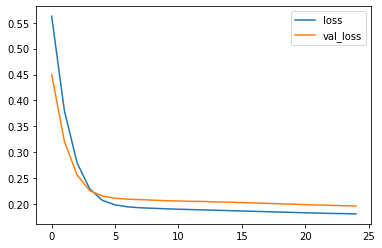

In [43]:

loss_df = pd.DataFrame(losses.history)
loss_df.loc[:,['loss','val_loss']].plot()

In [44]:
print(test_df.head(500))

      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          1   
6          0  69.0             0              0             0          1   
9          0  61.0             0              1             1          3   
12         0  50.0             1              0             1          2   
14         1  75.0             1              0             1          1   
...      ...   ...           ...            ...           ...        ...   
1955       1  42.0             0              0             1          1   
1956       0  56.0             0              0             0          1   
1957       1  46.0             0              0             1          1   
1961       1  37.0             0              0             1          1   
1965       1  53.0             0              0             1          1   

      Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0              

In [70]:
#Generating Dependent Variable Vectors
Y = df.iloc[:,-1].values

In [ ]:
#Encoding Categorical Variable Gender
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()
X[:,2] = np.array(LE1.fit_transform(X[:,2]))